In [1]:
from __future__ import print_function
import numpy as np 
import time
import plaidml.keras 
plaidml.keras.install_backend()
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.datasets import mnist
import numpy as np
%pylab inline
import pandas as pd
from keras import utils as ut

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open("./data/fer2013/fer2013.csv") as f:
    content = f.readlines()
    lines = np.array(content)
    num_of_instances = lines.size
print("number of instances: ",num_of_instances)


number of instances:  35888


In [3]:
train_images, train_labels, test_images, test_labels = [], [], [], []
 
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
        val = img.split(" ")
        pixels = np.array(val, 'float32')
        #emotion = ut.to_categorical(emotion, 7)
        if 'Training' in usage:
            train_labels.append(emotion)
            train_images.append(pixels)
        elif 'PublicTest' in usage:
            test_labels.append(emotion)
            test_images.append(pixels)
    except:
          print("", end="")

In [4]:
train_images = np.array(train_images)
train_labels = np.array(train_labels) 
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [5]:
train_images.shape

(28709, 2304)

In [6]:
from keras.utils import to_categorical
 
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 


Training data shape :  (28709, 2304) (28709,)
Testing data shape :  (3589, 2304) (3589,)
Total number of outputs :  7
Output classes :  ['0' '1' '2' '3' '4' '5' '6']


IndexError: too many indices for array

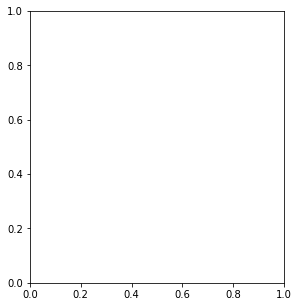

In [7]:
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [7]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [8]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [9]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  0
After conversion to categorical ( one-hot ) :  [ 1.  0.  0.  0.  0.  0.  0.]


In [10]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))



INFO:plaidml:Opening device "llvm_preview_cpu.0"


In [11]:
from keras.layers import Dropout

In [12]:
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dense(512, activation='relu'))

model_reg.add(Dense(nClasses, activation='softmax'))


In [13]:
model_reg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
history = model_reg.fit(train_data, train_labels_one_hot, batch_size=2048, epochs=100, verbose=1,validation_data=(test_data, test_labels_one_hot))

Train on 28709 samples, validate on 3589 samples
Epoch 1/100
28709/28709 [==============================] - 52s - loss: 1.9435 - acc: 0.1320 - val_loss: 1.8818 - val_acc: 0.2494
Epoch 2/100
28709/28709 [==============================] - 38s - loss: 1.8636 - acc: 0.2419 - val_loss: 1.9700 - val_acc: 0.2148
Epoch 3/100
18432/28709 [==================>...........] - ETA: 13s - loss: 1.8669 - acc: 0.2242

KeyboardInterrupt: 

In [ ]:
[test_loss, test_acc] = model_reg.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
